In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [35]:
data=pd.read_csv('winequality-red.csv')

In [36]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [38]:
missing_values = data.isnull()

# Step 3: Summarize Missing Values
missing_count = missing_values.sum()

# Print summary of missing values
print("Missing values summary:")
print(missing_count)

Missing values summary:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [39]:
# Define your features (independent variables) and target (dependent variable)
features = ['fixed acidity', 'volatile acidity', 'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
target = ["quality"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 1279 samples
Test set size: 320 samples


In [40]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
y_pred_train = clf_gini.predict(X_test)

In [42]:
y_pred_train

array([6, 6, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 5, 7, 7, 6, 7, 7, 5, 6, 5, 5,
       5, 6, 6, 7, 7, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 6, 5,
       6, 5, 7, 5, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6,
       5, 6, 6, 7, 6, 5, 6, 7, 6, 5, 5, 6, 5, 5, 6, 7, 6, 7, 6, 7, 5, 5,
       6, 6, 7, 7, 7, 6, 7, 6, 5, 6, 5, 5, 7, 7, 5, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       7, 6, 5, 5, 7, 5, 7, 6, 7, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7,

In [43]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 0.5856
Test set score: 0.5563


[Text(0.5, 0.875, 'x[10] <= 10.525\ngini = 0.639\nsamples = 1279\nvalue = [9, 42, 550, 514, 149, 15]'),
 Text(0.25, 0.625, 'x[6] <= 83.5\ngini = 0.548\nsamples = 803\nvalue = [7, 29, 468, 266, 31, 2]'),
 Text(0.125, 0.375, 'x[9] <= 0.585\ngini = 0.583\nsamples = 642\nvalue = [7.0, 27.0, 334.0, 242.0, 30.0, 2.0]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 259\nvalue = [4, 19, 171, 63, 2, 0]'),
 Text(0.1875, 0.125, 'gini = 0.595\nsamples = 383\nvalue = [3.0, 8.0, 163.0, 179.0, 28.0, 2.0]'),
 Text(0.375, 0.375, 'x[8] <= 3.545\ngini = 0.285\nsamples = 161\nvalue = [0.0, 2.0, 134.0, 24.0, 1.0, 0.0]'),
 Text(0.3125, 0.125, 'gini = 0.263\nsamples = 158\nvalue = [0.0, 2.0, 134.0, 21.0, 1.0, 0.0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.75, 0.625, 'x[10] <= 11.55\ngini = 0.636\nsamples = 476\nvalue = [2.0, 13.0, 82.0, 248.0, 118.0, 13.0]'),
 Text(0.625, 0.375, 'x[1] <= 0.375\ngini = 0.623\nsamples = 294\nvalue = [2.0, 12.0, 71.0, 159.0, 46.0, 

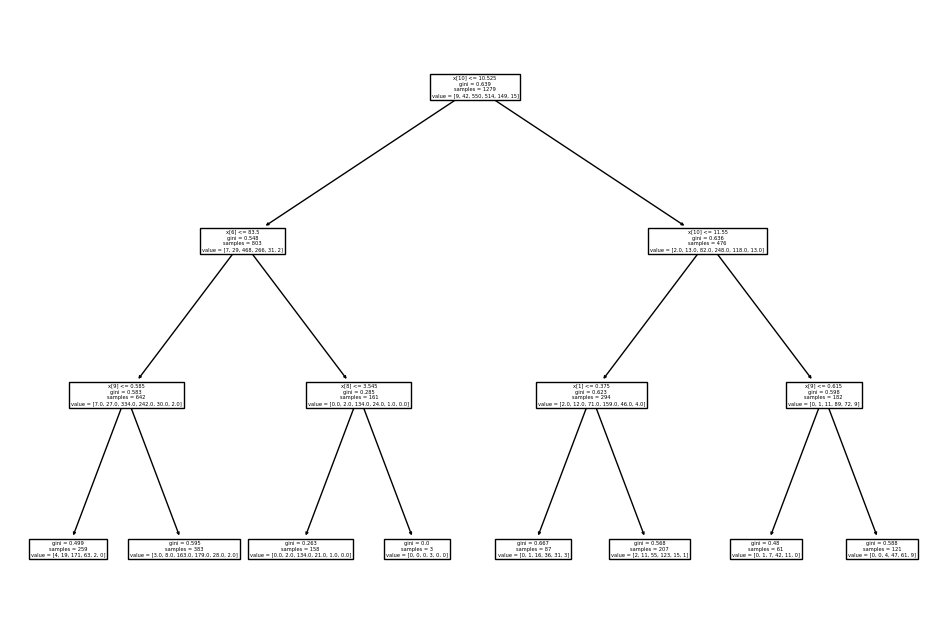

In [44]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 